# Mag TOV (7 Levels)

In [1]:
using Plots
include("../../Utils/misc.jl")

Main.Misc

## Scaling

M/day
      G128: [ 7.08e+03, 3.35e+03, 1.55e+03, 7.51e+02, 2.95e+02, 1.36e+02, 4.87e+01, 1.42e+01,]
Zcs/sec
      G128: [ 2.35e+08, 4.45e+08, 8.23e+08, 1.61e+09, 2.81e+09, 5.30e+09, 7.70e+09, 1.06e+10,]


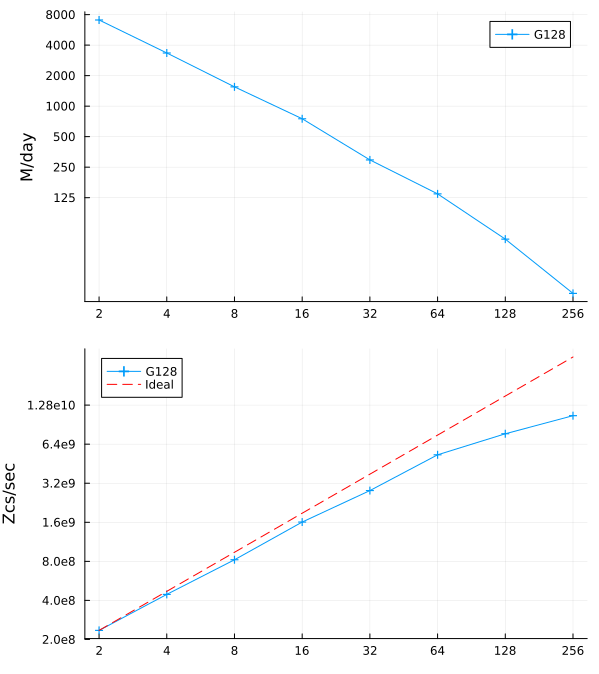

In [2]:
let patt_dirss = [
        ([
            (r"Z4c_L7_G128-N\d+-MPI\d+_r0000", "G128"),
        ], "../data/magTOV/Levels7/Weak", :cross),
    ]

    # Plot M/day
    plt1 = plot(ylabel="M/day", xscale=:log10, yscale=:log10)
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt1, xs, [string(n) for n in xs])
    ys = [125, 250, 500, 1000, 2000, 4000, 8000]
    yticks!(plt1, ys, [string(n) for n in ys])
    println("M/day")
    Misc.plot_scaling(plt1, patt_dirss; option="TotalComputeTime", is_plot_ideal=false, is_print_value=true)

    # Plot Zcs/sec
    plt2 = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [2, 4, 8, 16, 32, 64, 128, 256]
    xticks!(plt2, xs, [string(n) for n in xs])
    ys = [2e8, 4e8, 8e8, 1.6e9, 3.2e9, 6.4e9, 1.28e10]
    yticks!(plt2, ys, [string(n) for n in ys])
    println("Zcs/sec")
    Misc.plot_scaling(plt2, patt_dirss; option="ZcsPerSecond", is_plot_ideal=true, is_print_value=true)

    # Sum
    plt = plot(plt1, plt2, layout=(2,1), size = (600, 675))
    display(plt)
end

## Speed

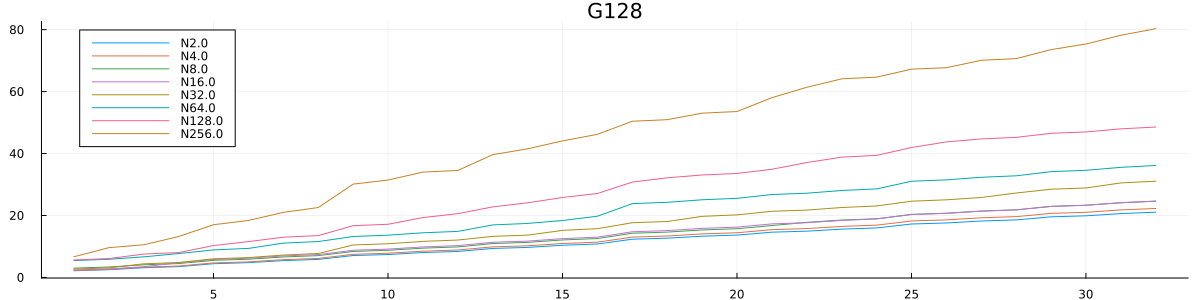

In [3]:
let patt_dirss = [
        ([
            (r"Z4c_L7_G128-N\d+-MPI\d+_r0000", "G128"),
        ], "../data/magTOV/Levels7/Weak", :cross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = Misc.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[3], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,4), size=(1200, 300))
    display(plt)
end